# Marketing Campaign for Banking Products

### Data Description:

The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

Data: ​ https://www.kaggle.com/itsmesunil/bank-loan-modelling/download

### Context:

The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.

### Attribute Information:

- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer in dollars
- ZIP Code: Home Address ZIP code.
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month in dollars
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage (if any) in dollars
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Does the customer use a credit card issued by the bank?

### Objective:

The classification goal is to predict the likelihood of a liability customer buying personal
loans.

### Steps and tasks:

1. Import the datasets and libraries, check datatype, statistical summary, shape, null values etc
2. Check if you need to clean the data for any of the variables
3. EDA: Study the data distribution in each attribute and target variable, share your findings.
        - Number of unique in each column?
        - Number of people with zero mortgage?
        - Number of people with zero credit card spending per month?
        - Value counts of all categorical columns.
        - Univariate and Bivariate analysis
4. Apply necessary transformations for the feature variables
5. Normalise your data and split the data into training and test set in the ratio of 70:30 respectively
6. Use the Logistic Regression model to predict the likelihood of a customer buying personal loans.
7. Print all the metrics related for evaluating the model performance
8. Build various other classification algorithms and compare their performance
9. Give a business understanding of your model

### 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values etc

In [203]:
#importing requires Libraries
import numpy as np
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [204]:
ls

48024_87370_bundle_archive.zip
Bank_Loan_Modelling.ipynb
Bank_Personal_Loan_Modelling.csv
Bank_Personal_Loan_Modelling.xlsx
ML-Project-2-Marketing-Campaign-for-Banking-Products-3.pdf
Untitled.ipynb


In [205]:
#Reading the data from csv file
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [206]:
#viewing the first 5 rows of the dataset
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [207]:
#Shape of the dataset (No of observations, No of features)
df.shape

(5000, 14)

In [208]:
#Checking the datatypes of the features 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [209]:
#Printing the Features names
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [210]:
#Various Statistical Measures on input data such as mean, standard deviation, minimum value, maximum value
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [211]:
#Checking for null values in the dataset
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<AxesSubplot:>

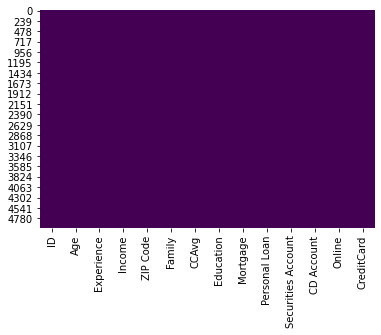

In [212]:
#Visualising the distribution of null Values
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')

#### Inference

From above, we can infer that there are no null values in the dataset

## 2. Check if you need to clean the data for any of the variables

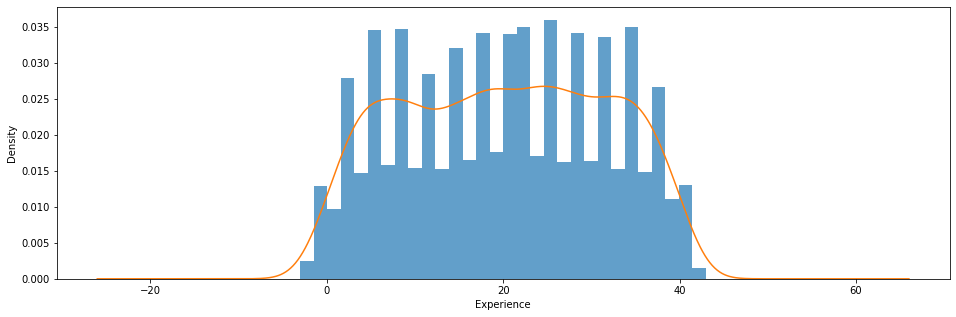

In [213]:
#checking the distribution of age
ax = df['Experience'].hist(bins = 30, density = True, stacked = True, alpha = 0.7, figsize = (16, 5))
df['Experience'].plot(kind = 'density')
ax.set_xlabel('Experience')
plt.show()

In [214]:
#Counting Experience values less than 0
df[df['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [215]:
df[df['Experience'] < 0]['Experience'].count()

52

#### Inference
- We have found negative values for attribute 'Experience' in the given dataset
- There are 52 such values less than 0, namely 33 of them are -1, 15 of them are -2 and 4 are of them are -3.
- So, we consider experience to be greater than or equal to 0 and hence we clean it and make them 0

In [216]:
#Getting Valid data from the dataset
correct_data = df[df['Experience'] > 0]

In [217]:
(correct_data['Experience']<0).sum()

0

In [218]:
#Getting all those IDs for which experience is less than 0
ID = df.loc[df.Experience < 0]['ID'].tolist()

In [219]:
len(ID)

52

In [220]:
#Replacing all those values of Experience less than 0 with 0
for id in ID:
    df.loc[df.loc[np.where(df['ID']==id)].index, 'Experience'] = 0

In [221]:
df[df['Experience'] < 0]['Experience'].count()

0

## 3. EDA: Study the data distribution in each attribute and target variable, share your findings.

#### Number of unique in each column

In [222]:
df.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

#### Number of people with zero mortgage

In [223]:
(df['Mortgage'] == 0).sum()

3462

#### Number of people with zero credit card spending per month

In [224]:
(df['CCAvg'] == 0).sum()

106

#### Value counts of all categorical columns

In [225]:
CAT = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for column in CAT:
    print(df[column].value_counts())
    

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4520
1     480
Name: Personal Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


#### Univariate and Bivariate analysis

In [226]:
#sns.pairplot(df, hue = 'Personal Loan')

From the above plot, on a closer look, we could find the relationships between all the features

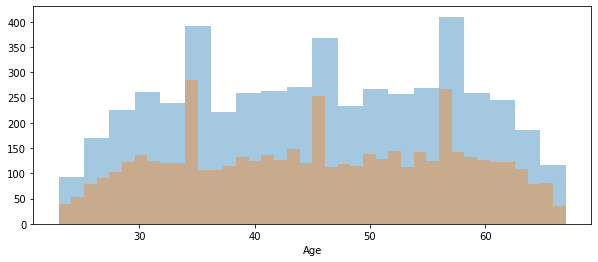

In [227]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 4))
ax = sns.distplot(df.Age.dropna(), bins = 20, label = 'will buy', ax = axes, kde = False)
ax = sns.distplot(df.Age.dropna(), bins = 40, label = 'will not buy', ax = axes, kde = False)

From the above plot, We find that the those persons who will buy loan and will not buy loan are distrubuted equally according to age and the percentage of loan buyers is less in the given dataset

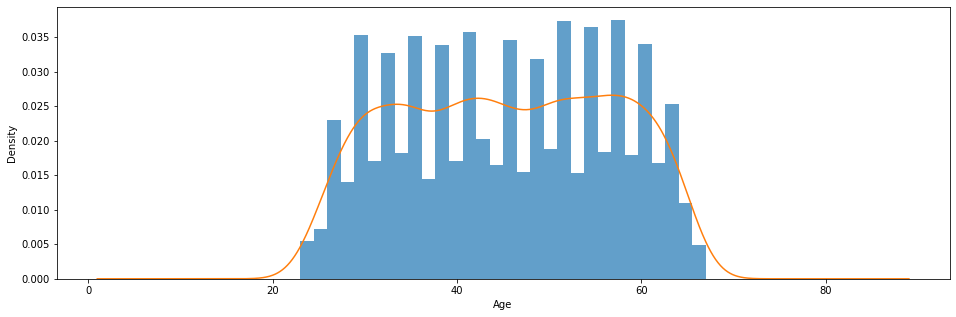

In [228]:
#checking the distribution of age
ax = df['Age'].hist(bins = 30, density = True, stacked = True, alpha = 0.7, figsize = (16, 5))
df['Age'].plot(kind = 'density')
ax.set_xlabel('Age')
plt.show()

From the above plot, We find that the age is distributed between 20 and 70

In [229]:
#Knowing the count of those who will get and who will not get a loan
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

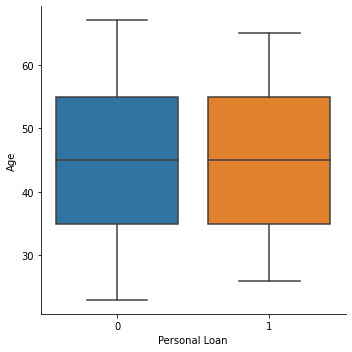

In [230]:
sns.catplot(x = 'Personal Loan', y = 'Age', data = df, kind = 'box')

<AxesSubplot:xlabel='Age', ylabel='Personal Loan'>

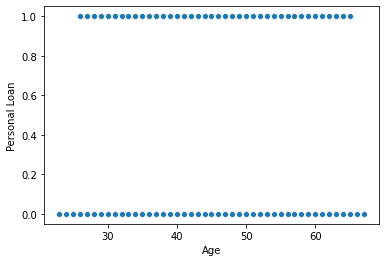

In [231]:
sns.scatterplot(x = 'Age', y = 'Personal Loan', data = df)

### Inference
From the above plots, we can infer that loan buyers age will be from around 25 to 70 and mean for both loan buyers and non loan buyers are equal

<AxesSubplot:xlabel='Age', ylabel='Experience'>

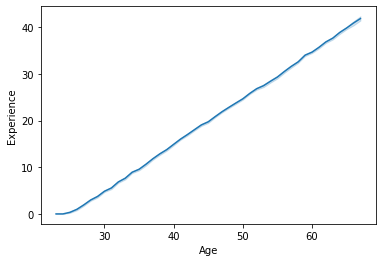

In [232]:
sns.lineplot(x = 'Age', y = 'Experience', data = df)

### Inference
From the above plot, we could see that as age increases experience increases

In [233]:
df[df['Family'] == 1]['Income'].mean()

78.62228260869566

In [234]:
df[df['Family'] == 2]['Income'].mean()

84.2391975308642

In [235]:
df[df['Family'] == 3]['Income'].mean()

66.9049504950495

In [236]:
df[df['Family'] == 4]['Income'].mean()

62.51309328968903

### Inference
We could infer from the above cells the respective mean of the income earned according to the family size

<AxesSubplot:>

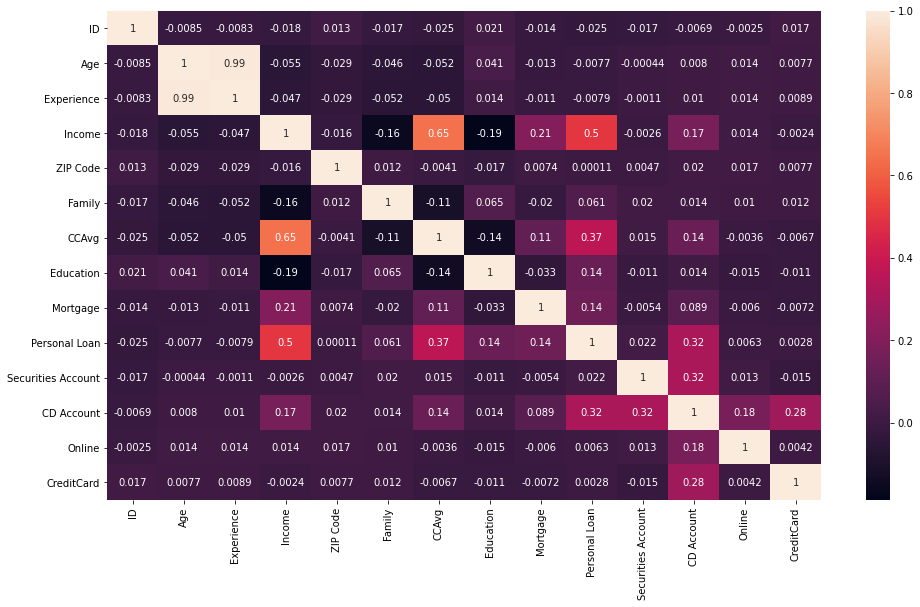

In [237]:
corr = df.corr()
plt.figure(figsize = (16,9))
sns.heatmap(corr, annot = True)

### Inference:
1. Experience and Age are highly correlated with eachother.
2. Income and CCAvg are moderately correlated with each other.
3. One feature among Exerience and age can be removed to avoid multi-colinearity issue

<AxesSubplot:xlabel='Online', ylabel='Income'>

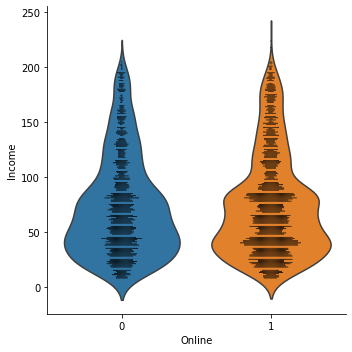

In [238]:
g = sns.catplot(x = 'Online', y = 'Income', data = df, kind = 'violin', inner = None)
sns.swarmplot(x = 'Online', y = 'Income', color = 'k', size = 1, ax = g.ax, data = df)

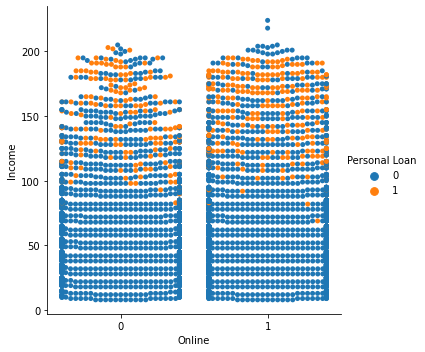

In [239]:
sns.catplot(x = 'Online', y = 'Income', data = df, kind = 'swarm', hue = 'Personal Loan')

### Inference

From the above two plots, we can infer that majority of income earned is around 50 and income with more than 100 is more likely to get a loan

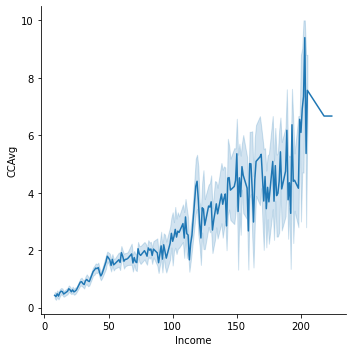

In [240]:
sns.relplot(x = 'Income', y = 'CCAvg', data = df, kind = 'line')

### Inference
- As Income increases CCAvg increases

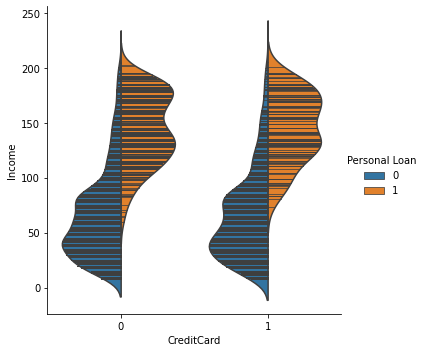

In [241]:
sns.catplot(x = 'CreditCard', y = 'Income', data = df, hue = 'Personal Loan', kind = 'violin',
             split = True,inner = 'stick')

### Inference
The above plot shows us that irrespective of where a person is having CreditCard or not if his Income is more than around 100 then is more likely to get a loan

<AxesSubplot:xlabel='Education', ylabel='Income'>

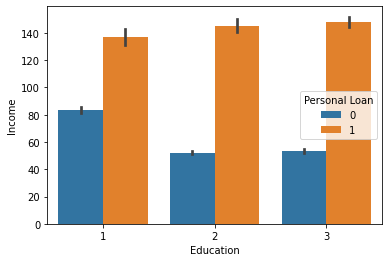

In [242]:
sns.barplot(x = 'Education', y = 'Income', data = df, hue = 'Personal Loan')

### Inference
From the above plot, we can infer that Undergraduates are less likely to get a loan than a graduate or professional 

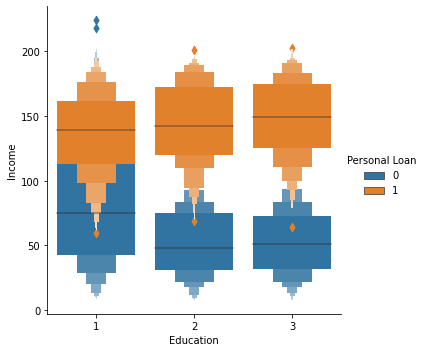

In [243]:
sns.catplot(x = 'Education', y = 'Income', kind = 'boxen', data = df, hue = 'Personal Loan', dodge = False)

### Inference
From the above plot we can infer that undergraduates are likely to get more income, that is fresh talents are getting rewarded more and also as infered before if the income is more than 100 then most likely loan will be given

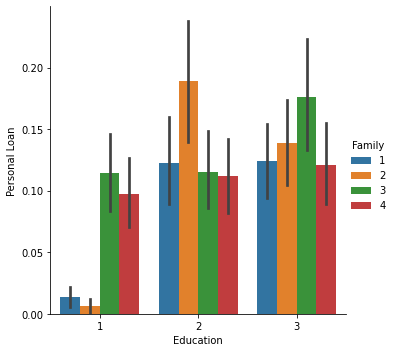

In [244]:
sns.catplot(x = 'Education', y = 'Personal Loan', data = df, kind = 'bar', hue = 'Family')

### Inference
From the above plot we can see that,
- an undergraduate with family size 1 is less likely to get a loan
- a graduate with family size 2 and a professional with a family size 3 are more likely to get a loan 

<AxesSubplot:>

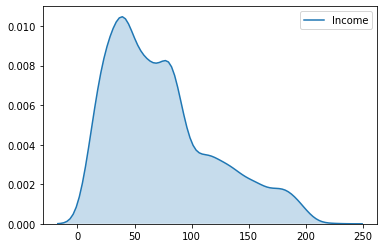

In [245]:
sns.kdeplot(df['Income'], shade = True)

### Inference:
From the above plot, we can infer that most of the income lies near 50

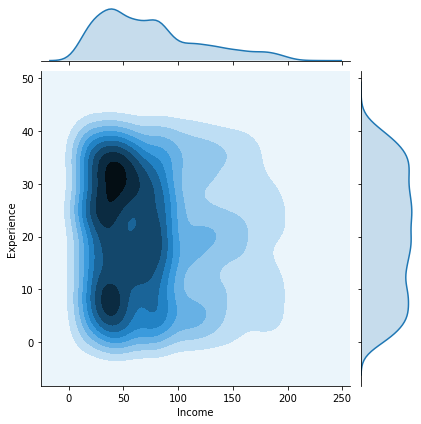

In [246]:
x = df['Income']
y = df['Experience']
sns.jointplot(x, y, kind = 'kde')
plt.show()

### Inference
From the above plot, we can see that unlike the distribution of income, the given dataset has equal distribution of the experience a person has

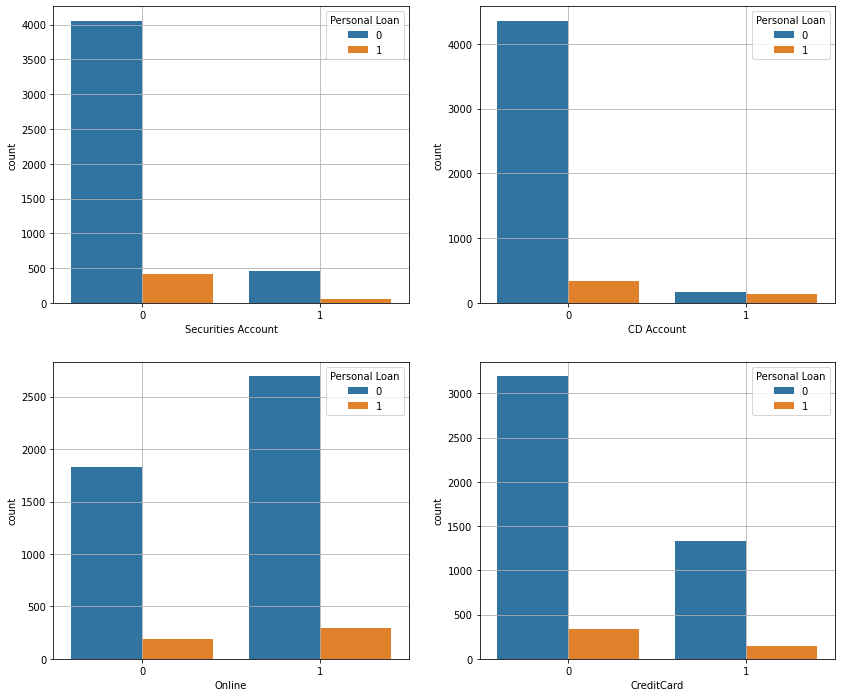

In [247]:
# Plotting Counts plot for Categorical features:
col=['Securities Account','CD Account','Online','CreditCard']
plt.figure(figsize=(14,12))
j=2
k=0
for i in col:
    plt.subplot(2,j,j*(k+1)//j)
    sns.countplot(x=i,hue='Personal Loan', data=df)
    k=k+1
    plt.grid(True)
plt.show()

### Inference:
1. People without the CD Accounts tend to have taken more Personal Loan. 
2. People with more Online accounts seem to take more Personal Loan
3. Very minimal number of people who have Securities Account have opted the Personal Loan.
4. Most of the people with the CreditCard seems to have not taken the Personal Loan.

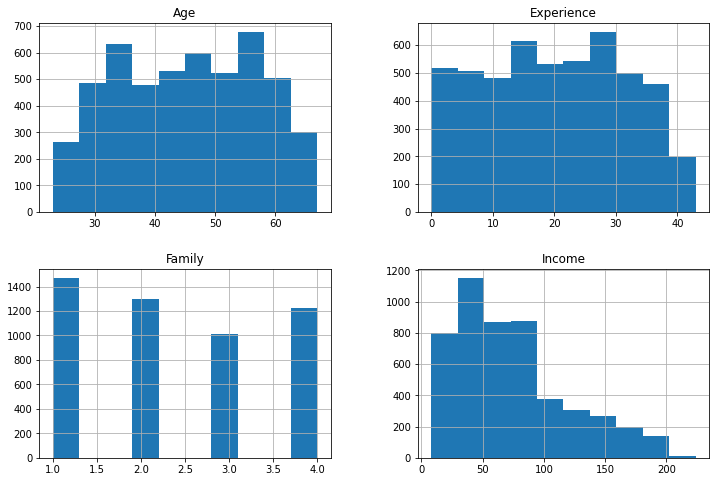

In [248]:

#Histogram plots.
features = ['Age', 'Experience', 'Family','Income']
df[features].hist(figsize=(12, 8))
plt.show()

### Inference
These plots shows us the data distribution of the input data


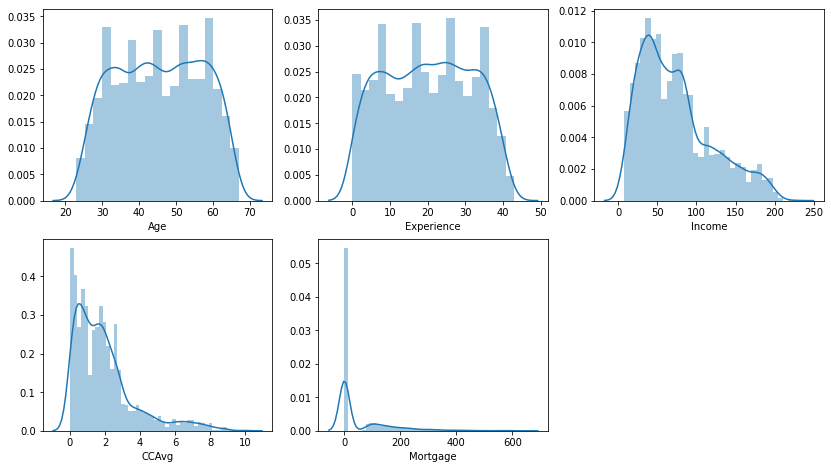

<Figure size 432x288 with 0 Axes>

In [249]:
#Distribution plots.
col=['Age', 'Experience', 'Income', 'CCAvg','Mortgage']

i=3
j=0
plt.figure(figsize=(14,12))
for k in col :
    plt.subplot(i,i,i*(j+1)//i)
    sns.distplot(df[k])
    j=j+1
plt.show()
plt.tight_layout()




### Inference:
From Distribution plots, we can observe the following conclusions
1. Age: The distribution is even across mean and hence normally distributed.
2. Experience: Even distribution across mean and hence normally distributed.
3. Income: Positively skewed that is median is lesser than the mean value.
4. CCAvg: Positively skewed that is median is lesser than the mean value.
5. Mortgage: Positively skewed that is median is lesser than the mean value.

## 4. Apply necessary transformations for the feature variables

<AxesSubplot:>

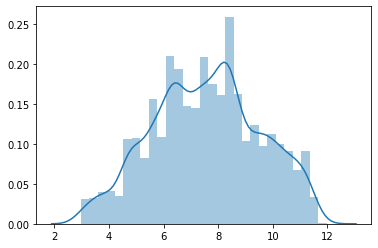

In [250]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = 'yeo-johnson', standardize = False)
df['Income'] = pt.fit_transform(df['Income'].values.reshape(-1, 1))
sns.distplot(temp)

In [251]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = 'yeo-johnson', standardize = False)
df['CCAvg'] = pt.fit_transform(df['CCAvg'].values.reshape(-1, 1))


In [252]:
df['Mortgage'] = pd.cut(df['Mortgage'], 
                        bins = [0, 100, 200, 300, 400, 500, 600, 700],
                        labels = [0, 1, 2, 3, 4, 5, 6],
                        include_lowest = True)

In [253]:
params = ['CD Account', 'Mortgage', 'Education', 'CCAvg', 'Income']

In [254]:
X = np.array(df[params])

In [255]:
X.shape

(5000, 5)

In [256]:
y = np.array(df['Personal Loan'])
y.shape

(5000,)

<AxesSubplot:xlabel='Mortgage'>

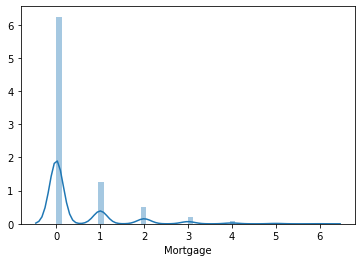

In [257]:
sns.distplot(df['Mortgage'])

In [258]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

## 5. Normalise your data and split the data into training and test set in the ratio of 70:30 respectively

In [259]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3500, 5), (3500,), (1500, 5), (1500,))

## 6. Use the Logistic Regression model to predict the likelihood of a customer buying personal loans.

In [260]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [261]:
model.fit(X_train, y_train)

LogisticRegression()

In [262]:
y_pred = model.predict(X_test)

In [263]:
from sklearn.metrics import confusion_matrix as cm
cm(y_test, y_pred)

array([[1340,   16],
       [  52,   92]])

In [264]:
model.score(X_test, y_test)

0.9546666666666667

In [265]:
model.score(X_train, y_train)

0.9502857142857143

## 7. Print all the metrics related for evaluating the model performance

In [183]:
from sklearn.metrics import accuracy_score, r2_score, log_loss, classification_report, f1_score
from sklearn.metrics import mean_absolute_error, precision_score,recall_score, roc_auc_score, auc, roc_curve
from sklearn.metrics import mean_squared_error, precision_recall_curve

### Metrics Evaluated:
1. Precision-Recall curve
2. ROC-AUC curve
3. Precision
4. Recall
5. Accuracy
6. Log loss
7. Area under curve for both ROC and precision-recall curves
8. Classification Report
9. Confusion Matrix

In [184]:
y_predict_prob = model.predict_proba(X_test)[:,1]

[fpr,tpr,thr] = roc_curve(y_test, y_predict_prob)
precision, recall, thresholds = precision_recall_curve(y_test,y_predict_prob)

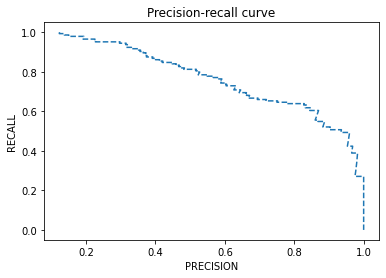

In [185]:
plt.plot(precision, recall, '--')
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
plt.title('Precision-recall curve')
plt.show()

Text(0.5, 1.0, 'ROC curve for logistic regression')

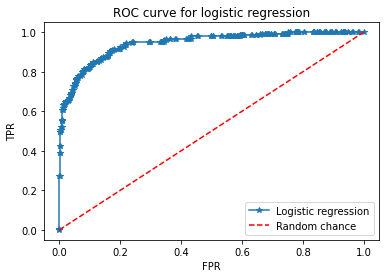

In [186]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for logistic regression')

In [187]:
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('Log loss: ',log_loss(y_test,y_pred))
print('Auc of ROC Curve: ',auc(fpr,tpr))
print('Auc of precision & recall: ',auc(recall,precision))

precision: 0.8348623853211009
recall: 0.6319444444444444
Accuracy:  0.9526666666666667
Log loss:  1.6348450111949357
Auc of ROC Curve:  0.943445796460177
Auc of precision & recall:  0.7839246552620633


In [188]:
# Classification Report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.96      0.99      0.97      1356
     class 1       0.83      0.63      0.72       144

    accuracy                           0.95      1500
   macro avg       0.90      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



In [189]:
cm(y_test, y_pred)

array([[1338,   18],
       [  53,   91]])

## 8. Build various other classification algorithms and compare their performance

In [190]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Various Classification Algorithms include:
1. Decision Tree
2. Random Forest
3. Naive bayes
4. KNN

Models have been trained and found the accuracy of each model.

#### Decision Tree Classifier Algorithm

In [191]:
DT_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [192]:
DT_y_pred= DT_model.predict(X_test)
DT_y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [193]:
DT_model.score(X_test,y_test)

0.97

#### Random Forest Classifier Algorithm

In [194]:
RF_model = RandomForestClassifier(max_depth=2, random_state=0)
RF_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [195]:
RF_y_pred=RF_model.predict(X_test)
RF_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [196]:
RF_model.score(X_test,y_test)

0.926

#### Naive Bayes

In [197]:
NB_model=GaussianNB()
NB_model.fit(X_train,y_train)

GaussianNB()

In [198]:
NB_y_pred = NB_model.predict(X_test)
NB_y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [199]:
NB_model.score(X_test,y_test)

0.8873333333333333

#### KNN Algorithm

In [200]:
knn_model = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=21)

In [201]:
knn_y_pred=knn_model.predict(X_test)

In [202]:
knn_model.score(X_test,y_test)

0.9666666666666667